In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
history = 5 #specify the number of particles
radius = 10000
r = np.full((history, 2), None, dtype=object)

def initialize_particles():
    for i in range(history):
        teta = np.random.uniform(0, 2*np.pi)
        position = np.random.uniform(0, radius)
        r[i, 0] = position * np.cos(teta)
        r[i, 1] = position * np.sin(teta)

In [3]:
fr = 1000
fuel = np.full((1, 2), None, dtype=object)

def initialize_fuel():
    fuel[0, 0] = 0
    fuel[0, 1] = 0

In [4]:
speed = 3000
v = np.full((history, 2), None, dtype=object)

def initialize_speed():
    for i in range(history):
        teta = np.random.uniform(0, 2*np.pi)
        teta2 = np.random.uniform(0, 2*np.pi)
        v[i, 0] = speed * np.cos(teta)
        v[i, 1] = speed * np.sin(teta2)

In [5]:
fps = 10
dt = 1/fps
final_time = 20
steps = int(final_time/dt)
record = np.full((steps, history, 2), None, dtype=object)
record[0,:,:] = r[:,:]
init_record = record


def move():
    global history
    global r
    global v
    global record
    global init_record

    for i in range(1, steps):
        for j in range(history):
            if r[j, 0] == 11000:
                continue
            elif (fuel[0, 0] - fr <= r[j, 0] <= fuel[0, 0] + fr and
              fuel[0, 1] - fr <= r[j, 1] <= fuel[0, 1] + fr and
              np.sqrt(r[j, 0]**2 + r[j, 1]**2) <= fr):
                r[j,:] = 11000
                v[j,:] = 0
                for k in range(2):
                    teta = np.random.uniform(0, 2*np.pi)
                    position = np.random.uniform(0, radius)
                    new_r = np.array([position * np.cos(teta), position * np.sin(teta)])
                    teta2 = np.random.uniform(0, 2*np.pi)
                    teta3 = np.random.uniform(0, 2*np.pi)
                    new_v = np.array([speed * np.cos(teta2), speed * np.sin(teta3)])
                    r = np.concatenate((r, [new_r]), axis=0)
                    v = np.concatenate((v, [new_v]), axis=0)
                history += 2
                record = np.full((steps, history, 2), None, dtype=object)
                record[:, :history-2, :] = init_record
                init_record = record
                continue
            elif np.sqrt(r[j, 0]**2 + r[j, 1]**2) < radius:
                r[j, :] = r[j, :] + v[j, :] * dt
                continue
            else:
                distance_to_origin = np.sqrt(r[j, 0]**2 + r[j, 1]**2)
                normal_vector = np.array([r[j, 0], r[j, 1]]) / distance_to_origin
                dot_product = np.dot(np.array([v[j, 0], v[j, 1]]), normal_vector)
                v[j, 0] -= 2 * dot_product * normal_vector[0]
                v[j, 1] -= 2 * dot_product * normal_vector[1]
                r[j, :] = r[j, :] + v[j, :] * dt
        record[i,:,:] = r[:,:]
        init_record = record

In [6]:
initialize_particles()
initialize_fuel()
initialize_speed()
move()

In [7]:
init_record.shape

(200, 7, 2)

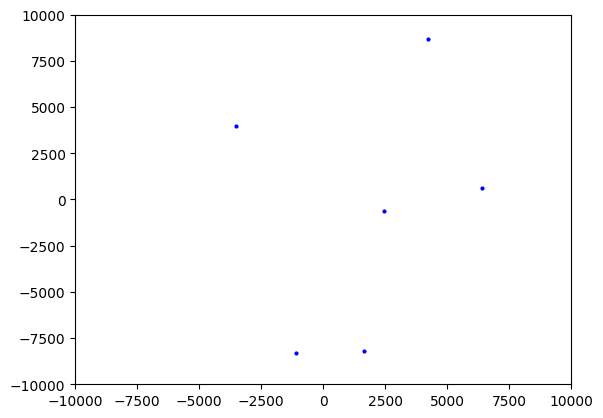

In [8]:
# Create a figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)

# Create a scatter plot for the particles with a specified size (e.g., ms=2)
particles, = ax.plot([], [], 'bo', ms=2)

# Function to initialize the plot
def init():
    particles.set_data([], [])
    return particles,

# Function to update particle positions for each frame
def update(frame):
    x_data = record[frame,:,0].copy()
    y_data = record[frame,:,1].copy()
    particles.set_data(x_data, y_data)
    return particles,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(record), init_func=init, interval=50, blit=True)

# Set up the animation writer (for saving as a GIF)
Writer = animation.writers['pillow']
writer = Writer(fps=fps, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as a GIF
ani.save('particle_animation.gif', writer=writer)

# Display the animation
plt.show()
